In [80]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy 

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [83]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
temp = []
humidity = []
cloud = []
wind_speed = []
lat = []
city_name = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
  
    # If the city is unique, then add it to a our cities list
          
    if city not in cities:
        cities.append(city)


## Perform API Calls

In [84]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?"
# Build query URL
query_url = url + "appid=" + api_key + "&q=" 
print(query_url)
len(cities)        

http://api.openweathermap.org/data/2.5/weather?appid=f806b8d38fb4fe8db0cda5c0e9b84742&q=


650

In [85]:
for city in cities:
    weather_response = requests.get(query_url + city).json()
    print(weather_response)  
    try:
        city_name.append(weather_response['name'])
        temp.append(weather_response['main']['temp'])
        humidity.append(weather_response['main']['humidity'])
        cloud.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        lat.append(weather_response['coord']['lat'])
    except KeyError:  
        print(f"no information found for those: {city}")
    
   

{'coord': {'lon': 96.16, 'lat': 27.93}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 293.355, 'pressure': 874.81, 'humidity': 96, 'temp_min': 293.355, 'temp_max': 293.355, 'sea_level': 1015.85, 'grnd_level': 874.81}, 'wind': {'speed': 0.68, 'deg': 43.0054}, 'clouds': {'all': 92}, 'dt': 1531250517, 'sys': {'message': 0.0031, 'country': 'IN', 'sunrise': 1531176402, 'sunset': 1531226084}, 'id': 1254709, 'name': 'Tezu', 'cod': 200}
{'coord': {'lon': 123.73, 'lat': 50.57}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 284.455, 'pressure': 957.09, 'humidity': 84, 'temp_min': 284.455, 'temp_max': 284.455, 'sea_level': 1026.72, 'grnd_level': 957.09}, 'wind': {'speed': 0.98, 'deg': 234.505}, 'clouds': {'all': 44}, 'dt': 1531250517, 'sys': {'message': 0.0036, 'country': 'CN', 'sunrise': 1531165499, 'sunset': 1531223728}, 'id': 2

{'coord': {'lon': -50.22, 'lat': -30.17}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 288.855, 'pressure': 1029.47, 'humidity': 77, 'temp_min': 288.855, 'temp_max': 288.855, 'sea_level': 1039.89, 'grnd_level': 1029.47}, 'wind': {'speed': 4.38, 'deg': 166.005}, 'clouds': {'all': 68}, 'dt': 1531250520, 'sys': {'message': 0.0042, 'country': 'BR', 'sunrise': 1531217803, 'sunset': 1531254973}, 'id': 3466165, 'name': 'Cidreira', 'cod': 200}
{'coord': {'lon': -45.24, 'lat': 60.14}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 276.155, 'pressure': 1007.1, 'humidity': 95, 'temp_min': 276.155, 'temp_max': 276.155, 'sea_level': 1019.18, 'grnd_level': 1007.1}, 'wind': {'speed': 2.33, 'deg': 79.5054}, 'rain': {'3h': 1.585}, 'clouds': {'all': 92}, 'dt': 1531250520, 'sys': {'message': 0.0042, 'country': 'GL', 'sunrise': 1531202134, 'sunset':

{'coord': {'lon': 102.47, 'lat': 71.98}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 283.055, 'pressure': 1017.31, 'humidity': 76, 'temp_min': 283.055, 'temp_max': 283.055, 'sea_level': 1021.81, 'grnd_level': 1017.31}, 'wind': {'speed': 3.88, 'deg': 311.505}, 'clouds': {'all': 24}, 'dt': 1531250523, 'sys': {'message': 0.0039, 'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'id': 2022572, 'name': 'Khatanga', 'cod': 200}
{'coord': {'lon': 170.27, 'lat': 69.7}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 273.605, 'pressure': 1017.88, 'humidity': 100, 'temp_min': 273.605, 'temp_max': 273.605, 'sea_level': 1025.14, 'grnd_level': 1017.88}, 'wind': {'speed': 3.63, 'deg': 325.505}, 'clouds': {'all': 56}, 'dt': 1531250523, 'sys': {'message': 0.0031, 'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'id': 2122090, 'name': 'Pevek', 'cod': 200

{'coord': {'lon': 16.92, 'lat': -3.02}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 300.155, 'pressure': 989.76, 'humidity': 55, 'temp_min': 300.155, 'temp_max': 300.155, 'sea_level': 1023.8, 'grnd_level': 989.76}, 'wind': {'speed': 1.33, 'deg': 153.005}, 'clouds': {'all': 0}, 'dt': 1531250527, 'sys': {'message': 0.0042, 'country': 'CD', 'sunrise': 1531198745, 'sunset': 1531241792}, 'id': 2312249, 'name': 'Mushie', 'cod': 200}
{'coord': {'lon': 147.06, 'lat': -42.78}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 278.15, 'pressure': 1019, 'humidity': 80, 'temp_min': 278.15, 'temp_max': 278.15}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 320}, 'clouds': {'all': 40}, 'dt': 1531249200, 'sys': {'type': 1, 'id': 8195, 'message': 0.0029, 'country': 'AU', 'sunrise': 1531172431, 'sunset': 1531205646}, 'id': 2155415, 'name': 

{'coord': {'lon': -173.23, 'lat': 64.42}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 277.855, 'pressure': 1011.89, 'humidity': 100, 'temp_min': 277.855, 'temp_max': 277.855, 'sea_level': 1018.08, 'grnd_level': 1011.89}, 'wind': {'speed': 3.68, 'deg': 332.505}, 'clouds': {'all': 24}, 'dt': 1531250530, 'sys': {'message': 0.0586, 'country': 'RU', 'sunrise': 1531229394, 'sunset': 1531302280}, 'id': 4031574, 'name': 'Provideniya', 'cod': 200}
{'coord': {'lon': 147.9, 'lat': 70.62}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 278.905, 'pressure': 1025.99, 'humidity': 78, 'temp_min': 278.905, 'temp_max': 278.905, 'sea_level': 1028.09, 'grnd_level': 1025.99}, 'wind': {'speed': 3.83, 'deg': 119.505}, 'clouds': {'all': 0}, 'dt': 1531250530, 'sys': {'message': 0.009, 'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'id': 2126123, 'name': 'Cho

{'coord': {'lon': -159.78, 'lat': -21.21}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 294.15, 'pressure': 1020, 'humidity': 83, 'temp_min': 294.15, 'temp_max': 294.15}, 'visibility': 10000, 'wind': {'speed': 6.2, 'deg': 70}, 'clouds': {'all': 75}, 'dt': 1531249200, 'sys': {'type': 1, 'id': 8340, 'message': 0.0034, 'country': 'CK', 'sunrise': 1531243016, 'sunset': 1531282350}, 'id': 4035715, 'name': 'Avarua', 'cod': 200}
{'coord': {'lon': 2.75, 'lat': 51.13}, 'weather': [{'id': 310, 'main': 'Drizzle', 'description': 'light intensity drizzle rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 288.81, 'pressure': 1021, 'humidity': 77, 'temp_min': 288.15, 'temp_max': 289.15}, 'visibility': 10000, 'wind': {'speed': 8.2, 'deg': 350}, 'clouds': {'all': 75}, 'dt': 1531249200, 'sys': {'type': 1, 'id': 4857, 'message': 0.0043, 'country': 'BE', 'sunrise': 1531194389, 'sunset': 1531252912}, 'i

{'coord': {'lon': -69.36, 'lat': 77.48}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 273.505, 'pressure': 978.98, 'humidity': 97, 'temp_min': 273.505, 'temp_max': 273.505, 'sea_level': 1010.34, 'grnd_level': 978.98}, 'wind': {'speed': 3.58, 'deg': 194.505}, 'clouds': {'all': 88}, 'dt': 1531250536, 'sys': {'message': 0.0031, 'country': 'GL', 'sunrise': 0, 'sunset': 0}, 'id': 3831208, 'name': 'Qaanaaq', 'cod': 200}
{'coord': {'lon': 49.05, 'lat': -13.19}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 295.705, 'pressure': 1008.89, 'humidity': 60, 'temp_min': 295.705, 'temp_max': 295.705, 'sea_level': 1032.92, 'grnd_level': 1008.89}, 'wind': {'speed': 6.48, 'deg': 130.005}, 'clouds': {'all': 0}, 'dt': 1531250536, 'sys': {'message': 0.0043, 'country': 'MG', 'sunrise': 1531192045, 'sunset': 1531233071}, 'id': 1082243, 'name': 'Ambi

{'coord': {'lon': -53.46, 'lat': -33.69}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 285.855, 'pressure': 1041.87, 'humidity': 81, 'temp_min': 285.855, 'temp_max': 285.855, 'sea_level': 1043.41, 'grnd_level': 1041.87}, 'wind': {'speed': 5.88, 'deg': 181.505}, 'clouds': {'all': 44}, 'dt': 1531250538, 'sys': {'message': 0.0029, 'country': 'UY', 'sunrise': 1531219060, 'sunset': 1531255272}, 'id': 3443061, 'name': 'Chuy', 'cod': 200}
{'coord': {'lon': -73.76, 'lat': -42.48}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 282.405, 'pressure': 1015.21, 'humidity': 100, 'temp_min': 282.405, 'temp_max': 282.405, 'sea_level': 1030.12, 'grnd_level': 1015.21}, 'wind': {'speed': 1.38, 'deg': 351.005}, 'rain': {'3h': 0.455}, 'clouds': {'all': 80}, 'dt': 1531250539, 'sys': {'message': 0.0464, 'country': 'CL', 'sunrise': 1531225355, 'sunse

{'coord': {'lon': 143.23, 'lat': 51.71}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 280.955, 'pressure': 1026.55, 'humidity': 97, 'temp_min': 280.955, 'temp_max': 280.955, 'sea_level': 1028.78, 'grnd_level': 1026.55}, 'wind': {'speed': 3.18, 'deg': 139.005}, 'clouds': {'all': 68}, 'dt': 1531250584, 'sys': {'message': 0.1625, 'country': 'RU', 'sunrise': 1531160471, 'sunset': 1531219393}, 'id': 2122783, 'name': 'Katangli', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
no information found for those: ngukurr
{'coord': {'lon': -96.67, 'lat': 40.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 306.54, 'pressure': 1020, 'humidity': 41, 'temp_min': 305.15, 'temp_max': 307.15}, 'visibility': 16093, 'wind': {'speed': 3.6, 'deg': 190}, 'clouds': {'all': 1}, 'dt': 1531248840, 'sys': {'type': 1, 'id': 1908, 'message': 0.0047, '

{'coord': {'lon': -78.17, 'lat': 18.44}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 303.15, 'pressure': 1013, 'humidity': 70, 'temp_min': 303.15, 'temp_max': 303.15}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 70}, 'clouds': {'all': 40}, 'dt': 1531249200, 'sys': {'type': 1, 'id': 4112, 'message': 0.0255, 'country': 'JM', 'sunrise': 1531219392, 'sunset': 1531266784}, 'id': 3489657, 'name': 'Lucea', 'cod': 200}
{'coord': {'lon': -68.59, 'lat': 70.47}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 285.15, 'pressure': 1002, 'humidity': 62, 'temp_min': 285.15, 'temp_max': 285.15}, 'visibility': 40233, 'wind': {'speed': 3.6, 'deg': 120}, 'clouds': {'all': 40}, 'dt': 1531249200, 'sys': {'type': 1, 'id': 3585, 'message': 0.0042, 'country': 'CA', 'sunrise': 0, 'sunset': 0}, 'id': 5924351, 'name': 'Clyde River', 'cod'

{'coord': {'lon': 66.31, 'lat': 51.1}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 295.705, 'pressure': 986.6, 'humidity': 54, 'temp_min': 295.705, 'temp_max': 295.705, 'sea_level': 1018.97, 'grnd_level': 986.6}, 'wind': {'speed': 2.88, 'deg': 10.0054}, 'clouds': {'all': 0}, 'dt': 1531250548, 'sys': {'message': 0.0051, 'country': 'KZ', 'sunrise': 1531179133, 'sunset': 1531237657}, 'id': 1524606, 'name': 'Derzhavinsk', 'cod': 200}
{'coord': {'lon': 116.85, 'lat': -20.74}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 282.455, 'pressure': 1017.56, 'humidity': 39, 'temp_min': 282.455, 'temp_max': 282.455, 'sea_level': 1031.26, 'grnd_level': 1017.56}, 'wind': {'speed': 1.33, 'deg': 159.505}, 'clouds': {'all': 0}, 'dt': 1531250548, 'sys': {'message': 0.0261, 'country': 'AU', 'sunrise': 1531176577, 'sunset': 1531215994}, 'id': 6620339, 'n

{'coord': {'lon': 70.83, 'lat': 66.83}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 286.655, 'pressure': 1030.85, 'humidity': 60, 'temp_min': 286.655, 'temp_max': 286.655, 'sea_level': 1032.03, 'grnd_level': 1030.85}, 'wind': {'speed': 6.73, 'deg': 41.0054}, 'clouds': {'all': 8}, 'dt': 1531250552, 'sys': {'message': 0.0036, 'country': 'RU', 'sunrise': 1531165803, 'sunset': 1531248275}, 'id': 1486321, 'name': 'Yar-Sale', 'cod': 200}
{'coord': {'lon': -2.24, 'lat': 4.87}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 298.855, 'pressure': 1024.69, 'humidity': 97, 'temp_min': 298.855, 'temp_max': 298.855, 'sea_level': 1026.96, 'grnd_level': 1024.69}, 'wind': {'speed': 4.58, 'deg': 202.005}, 'clouds': {'all': 68}, 'dt': 1531250552, 'sys': {'message': 0.0042, 'country': 'GH', 'sunrise': 1531202572, 'sunset': 1531247161}, 'id': 230361

{'coord': {'lon': 39.83, 'lat': -4.97}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 298.605, 'pressure': 1031.9, 'humidity': 100, 'temp_min': 298.605, 'temp_max': 298.605, 'sea_level': 1031.5, 'grnd_level': 1031.9}, 'wind': {'speed': 6.98, 'deg': 166.505}, 'clouds': {'all': 8}, 'dt': 1531250555, 'sys': {'message': 0.0033, 'country': 'TZ', 'sunrise': 1531193437, 'sunset': 1531236103}, 'id': 153955, 'name': 'Micheweni', 'cod': 200}
{'coord': {'lon': -72.45, 'lat': 11.78}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 305.15, 'pressure': 1006, 'humidity': 62, 'temp_min': 305.15, 'temp_max': 305.15}, 'visibility': 10000, 'wind': {'speed': 7.2, 'deg': 30}, 'clouds': {'all': 20}, 'dt': 1531249200, 'sys': {'type': 1, 'id': 4275, 'message': 0.0027, 'country': 'CO', 'sunrise': 1531218729, 'sunset': 1531264704}, 'id': 3675504, 'name': 'Mana

{'coord': {'lon': 129, 'lat': -3.31}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 298.555, 'pressure': 1022.42, 'humidity': 100, 'temp_min': 298.555, 'temp_max': 298.555, 'sea_level': 1022.91, 'grnd_level': 1022.42}, 'wind': {'speed': 4.73, 'deg': 133.505}, 'rain': {'3h': 1.52}, 'clouds': {'all': 68}, 'dt': 1531250559, 'sys': {'message': 0.0051, 'country': 'ID', 'sunrise': 1531171872, 'sunset': 1531214862}, 'id': 1651591, 'name': 'Amahai', 'cod': 200}
{'coord': {'lon': -151.75, 'lat': -16.48}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 299.655, 'pressure': 1030.12, 'humidity': 100, 'temp_min': 299.655, 'temp_max': 299.655, 'sea_level': 1030.12, 'grnd_level': 1030.12}, 'wind': {'speed': 9.43, 'deg': 123.005}, 'clouds': {'all': 0}, 'dt': 1531250491, 'sys': {'message': 0.0035, 'country': 'PF', 'sunrise': 1531240578, 'sunset': 153128

{'coord': {'lon': 169.85, 'lat': -46.28}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 276.005, 'pressure': 1006.46, 'humidity': 79, 'temp_min': 276.005, 'temp_max': 276.005, 'sea_level': 1023.68, 'grnd_level': 1006.46}, 'wind': {'speed': 2.98, 'deg': 316.005}, 'clouds': {'all': 8}, 'dt': 1531250561, 'sys': {'message': 0.0031, 'country': 'NZ', 'sunrise': 1531167673, 'sunset': 1531199465}, 'id': 2208248, 'name': 'Kaitangata', 'cod': 200}
{'coord': {'lon': 121.63, 'lat': 16.74}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 295.855, 'pressure': 999, 'humidity': 98, 'temp_min': 295.855, 'temp_max': 295.855, 'sea_level': 1018.16, 'grnd_level': 999}, 'wind': {'speed': 1.43, 'deg': 217.005}, 'rain': {'3h': 0.3725}, 'clouds': {'all': 56}, 'dt': 1531250563, 'sys': {'message': 0.0027, 'country': 'PH', 'sunrise': 1531171616, 'sunset': 15312186

{'coord': {'lon': -111.79, 'lat': 43.82}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 300.36, 'pressure': 1021, 'humidity': 35, 'temp_min': 298.15, 'temp_max': 302.15}, 'visibility': 16093, 'wind': {'speed': 5.1, 'deg': 180, 'gust': 9.8}, 'clouds': {'all': 1}, 'dt': 1531245360, 'sys': {'type': 1, 'id': 933, 'message': 0.0046, 'country': 'US', 'sunrise': 1531223730, 'sunset': 1531278567}, 'id': 5605242, 'name': 'Rexburg', 'cod': 200}
{'coord': {'lon': 48.9, 'lat': 63.46}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 292.005, 'pressure': 1011.89, 'humidity': 55, 'temp_min': 292.005, 'temp_max': 292.005, 'sea_level': 1030.93, 'grnd_level': 1011.89}, 'wind': {'speed': 3.13, 'deg': 44.5054}, 'clouds': {'all': 0}, 'dt': 1531250566, 'sys': {'message': 0.0039, 'country': 'RU', 'sunrise': 1531176997, 'sunset': 1531248071}, 'id': 544084, 'na

{'coord': {'lon': -61.3, 'lat': -5.81}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 304.15, 'pressure': 1014, 'humidity': 58, 'temp_min': 304.15, 'temp_max': 304.15}, 'visibility': 10000, 'wind': {'speed': 3.1, 'deg': 180}, 'clouds': {'all': 20}, 'dt': 1531245600, 'sys': {'type': 1, 'id': 4542, 'message': 0.0037, 'country': 'BR', 'sunrise': 1531217792, 'sunset': 1531260295}, 'id': 3663503, 'name': 'Manicore', 'cod': 200}
{'coord': {'lon': -157.84, 'lat': 21.44}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 300.9, 'pressure': 1018, 'humidity': 69, 'temp_min': 299.15, 'temp_max': 302.15}, 'visibility': 16093, 'wind': {'speed': 3.1}, 'clouds': {'all': 75}, 'dt': 1531249020, 'sys': {'type': 1, 'id': 828, 'message': 0.0051, 'country': 'US', 'sunrise': 1531238178, 'sunset': 1531286242}, 'id': 5856516, 'name': 'Ahuimanu', 'cod': 20

{'coord': {'lon': 118.78, 'lat': 42.12}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 288.855, 'pressure': 927.83, 'humidity': 91, 'temp_min': 288.855, 'temp_max': 288.855, 'sea_level': 1023.8, 'grnd_level': 927.83}, 'wind': {'speed': 1.08, 'deg': 145.505}, 'clouds': {'all': 56}, 'dt': 1531250573, 'sys': {'message': 0.0031, 'country': 'CN', 'sunrise': 1531168711, 'sunset': 1531222905}, 'id': 2035707, 'name': 'Mujiayingzi', 'cod': 200}
{'coord': {'lon': -63.55, 'lat': 8.12}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 301.055, 'pressure': 1015.69, 'humidity': 90, 'temp_min': 301.055, 'temp_max': 301.055, 'sea_level': 1026.07, 'grnd_level': 1015.69}, 'wind': {'speed': 1.98, 'deg': 123.005}, 'rain': {'3h': 0.2225}, 'clouds': {'all': 36}, 'dt': 1531250414, 'sys': {'message': 0.0047, 'country': 'VE', 'sunrise': 1531216965, 'sunset'

{'coord': {'lon': -55.08, 'lat': 5.88}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 302.105, 'pressure': 1026.31, 'humidity': 92, 'temp_min': 302.105, 'temp_max': 302.105, 'sea_level': 1026.51, 'grnd_level': 1026.31}, 'wind': {'speed': 3.03, 'deg': 0.505371}, 'clouds': {'all': 8}, 'dt': 1531250575, 'sys': {'message': 0.0115, 'country': 'SR', 'sunrise': 1531215155, 'sunset': 1531259942}, 'id': 3383434, 'name': 'Nieuw Amsterdam', 'cod': 200}
{'coord': {'lon': 24.66, 'lat': 14.2}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 296.155, 'pressure': 897.27, 'humidity': 65, 'temp_min': 296.155, 'temp_max': 296.155, 'sea_level': 1022.01, 'grnd_level': 897.27}, 'wind': {'speed': 3.83, 'deg': 128.005}, 'rain': {'3h': 0.33}, 'clouds': {'all': 76}, 'dt': 1531250576, 'sys': {'message': 0.0067, 'country': 'SD', 'sunrise': 1531195166, 'sunset': 15

{'coord': {'lon': -79.87, 'lat': 43.26}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 302.15, 'pressure': 1016, 'humidity': 30, 'temp_min': 301.15, 'temp_max': 303.15}, 'visibility': 24140, 'wind': {'speed': 7.7, 'deg': 330}, 'clouds': {'all': 40}, 'dt': 1531249200, 'sys': {'type': 1, 'id': 3661, 'message': 0.0035, 'country': 'CA', 'sunrise': 1531216182, 'sunset': 1531270793}, 'id': 5969785, 'name': 'Hamilton', 'cod': 200}
{'coord': {'lon': -135.01, 'lat': 68.22}, 'weather': [{'id': 521, 'main': 'Rain', 'description': 'shower rain', 'icon': '09d'}], 'base': 'stations', 'main': {'temp': 288.44, 'pressure': 1002, 'humidity': 76, 'temp_min': 286.15, 'temp_max': 290.15}, 'visibility': 24140, 'wind': {'speed': 1}, 'clouds': {'all': 75}, 'dt': 1531249200, 'sys': {'type': 1, 'id': 3513, 'message': 0.004, 'country': 'CA', 'sunrise': 0, 'sunset': 0}, 'id': 5882953, 'name': 'Aklavik', 'cod': 200}
{'coord': {'lo

{'coord': {'lon': -80.47, 'lat': 27.82}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 303.9, 'pressure': 1018, 'humidity': 58, 'temp_min': 303.15, 'temp_max': 304.15}, 'visibility': 16093, 'wind': {'speed': 5.7, 'deg': 50}, 'clouds': {'all': 40}, 'dt': 1531248960, 'sys': {'type': 1, 'id': 732, 'message': 0.0035, 'country': 'US', 'sunrise': 1531218822, 'sunset': 1531268454}, 'id': 4172372, 'name': 'Sebastian', 'cod': 200}
{'coord': {'lon': 113.57, 'lat': 56.17}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 279.005, 'pressure': 863.71, 'humidity': 91, 'temp_min': 279.005, 'temp_max': 279.005, 'sea_level': 1024.69, 'grnd_level': 863.71}, 'wind': {'speed': 0.28, 'deg': 311.505}, 'clouds': {'all': 0}, 'dt': 1531250582, 'sys': {'message': 0.0035, 'country': 'RU', 'sunrise': 1531165978, 'sunset': 1531228110}, 'id': 2016907, 'name':

{'coord': {'lon': -119.29, 'lat': 45.84}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 299.47, 'pressure': 1021, 'humidity': 30, 'temp_min': 298.15, 'temp_max': 300.15}, 'visibility': 16093, 'wind': {'speed': 4.6, 'deg': 270}, 'clouds': {'all': 1}, 'dt': 1531248780, 'sys': {'type': 1, 'id': 2289, 'message': 0.0035, 'country': 'US', 'sunrise': 1531225086, 'sunset': 1531280809}, 'id': 5731070, 'name': 'Hermiston', 'cod': 200}
{'coord': {'lon': 94.9, 'lat': 57.22}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 290.805, 'pressure': 993.57, 'humidity': 70, 'temp_min': 290.805, 'temp_max': 290.805, 'sea_level': 1023.96, 'grnd_level': 993.57}, 'wind': {'speed': 1.38, 'deg': 120.505}, 'clouds': {'all': 80}, 'dt': 1531250589, 'sys': {'message': 0.0038, 'country': 'RU', 'sunrise': 1531170000, 'sunset': 1531233046}, 'id': 1490058, 'name': 

{'coord': {'lon': -92.84, 'lat': 49.79}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 298.15, 'pressure': 1021, 'humidity': 38, 'temp_min': 298.15, 'temp_max': 298.15}, 'visibility': 14484, 'wind': {'speed': 1}, 'clouds': {'all': 1}, 'dt': 1531249200, 'sys': {'type': 1, 'id': 3643, 'message': 0.0033, 'country': 'CA', 'sunrise': 1531217735, 'sunset': 1531275456}, 'id': 5942913, 'name': 'Dryden', 'cod': 200}
{'coord': {'lon': -113.53, 'lat': 31.32}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 303.555, 'pressure': 1025.58, 'humidity': 81, 'temp_min': 303.555, 'temp_max': 303.555, 'sea_level': 1027.73, 'grnd_level': 1025.58}, 'wind': {'speed': 1.88, 'deg': 130.005}, 'rain': {'3h': 0.1075}, 'clouds': {'all': 76}, 'dt': 1531250293, 'sys': {'message': 0.0035, 'country': 'MX', 'sunrise': 1531226284, 'sunset': 1531276860}, 'id': 3991347, 'n

{'coord': {'lon': -82.53, 'lat': 33.19}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 306.91, 'pressure': 1020, 'humidity': 38, 'temp_min': 306.15, 'temp_max': 307.15}, 'visibility': 16093, 'wind': {'speed': 4.1, 'deg': 50}, 'clouds': {'all': 1}, 'dt': 1531248900, 'sys': {'type': 1, 'id': 783, 'message': 0.1301, 'country': 'US', 'sunrise': 1531218571, 'sunset': 1531269691}, 'id': 4231997, 'name': 'Avera', 'cod': 200}
{'coord': {'lon': -49.67, 'lat': 61.99}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 278.405, 'pressure': 1014.96, 'humidity': 91, 'temp_min': 278.405, 'temp_max': 278.405, 'sea_level': 1017.48, 'grnd_level': 1014.96}, 'wind': {'speed': 3.63, 'deg': 125.005}, 'rain': {'3h': 0.5625}, 'clouds': {'all': 92}, 'dt': 1531250598, 'sys': {'message': 1.8837, 'country': 'GL', 'sunrise': 1531201946, 'sunset': 1531270463}, 'id': 3

{'coord': {'lon': 121.19, 'lat': 38.95}, 'weather': [{'id': 701, 'main': 'Mist', 'description': 'mist', 'icon': '50n'}], 'base': 'stations', 'main': {'temp': 293.15, 'pressure': 1011, 'humidity': 100, 'temp_min': 293.15, 'temp_max': 293.15}, 'visibility': 5000, 'wind': {'speed': 1}, 'clouds': {'all': 44}, 'dt': 1531247400, 'sys': {'type': 1, 'id': 7473, 'message': 0.0033, 'country': 'CN', 'sunrise': 1531168726, 'sunset': 1531221736}, 'id': 1801722, 'name': 'Beihai', 'cod': 200}
{'coord': {'lon': -39.92, 'lat': -2.92}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 299.805, 'pressure': 1021.53, 'humidity': 96, 'temp_min': 299.805, 'temp_max': 299.805, 'sea_level': 1027.2, 'grnd_level': 1021.53}, 'wind': {'speed': 4.38, 'deg': 85.5054}, 'clouds': {'all': 48}, 'dt': 1531250602, 'sys': {'message': 0.0036, 'country': 'BR', 'sunrise': 1531212378, 'sunset': 1531255445}, 'id': 3393692, 'name': 'Itarema', 'cod':

{'coord': {'lon': -174.35, 'lat': -19.8}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 297.15, 'pressure': 1016, 'humidity': 73, 'temp_min': 297.15, 'temp_max': 297.15}, 'visibility': 10000, 'wind': {'speed': 4.6, 'deg': 90}, 'clouds': {'all': 40}, 'dt': 1531249200, 'sys': {'type': 1, 'id': 8331, 'message': 0.0027, 'country': 'TO', 'sunrise': 1531246357, 'sunset': 1531286003}, 'id': 4032369, 'name': 'Pangai', 'cod': 200}
{'coord': {'lon': -104.67, 'lat': 23.99}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 296.15, 'pressure': 1027, 'humidity': 43, 'temp_min': 296.15, 'temp_max': 296.15}, 'visibility': 19312, 'wind': {'speed': 2.1, 'deg': 110}, 'clouds': {'all': 40}, 'dt': 1531248180, 'sys': {'type': 1, 'id': 3983, 'message': 0.0036, 'country': 'MX', 'sunrise': 1531225112, 'sunset': 1531273783}, 'id': 4011743, 'name':

{'coord': {'lon': -137.51, 'lat': 60.75}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 283.855, 'pressure': 897.75, 'humidity': 62, 'temp_min': 283.855, 'temp_max': 283.855, 'sea_level': 1022.38, 'grnd_level': 897.75}, 'wind': {'speed': 1.58, 'deg': 177.505}, 'clouds': {'all': 56}, 'dt': 1531250611, 'sys': {'message': 0.0035, 'country': 'CA', 'sunrise': 1531223924, 'sunset': 1531290665}, 'id': 5969025, 'name': 'Haines Junction', 'cod': 200}
{'coord': {'lon': -10.05, 'lat': 5.88}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 297.105, 'pressure': 1020.72, 'humidity': 100, 'temp_min': 297.105, 'temp_max': 297.105, 'sea_level': 1027.45, 'grnd_level': 1020.72}, 'wind': {'speed': 2.13, 'deg': 194.505}, 'clouds': {'all': 92}, 'dt': 1531250612, 'sys': {'message': 0.0036, 'country': 'LR', 'sunrise': 1531204346, 'sunset': 15312491

{'coord': {'lon': 66.39, 'lat': 66.66}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 290.805, 'pressure': 1026.72, 'humidity': 40, 'temp_min': 290.805, 'temp_max': 290.805, 'sea_level': 1032.71, 'grnd_level': 1026.72}, 'wind': {'speed': 6.38, 'deg': 40.0054}, 'clouds': {'all': 8}, 'dt': 1531250614, 'sys': {'message': 0.003, 'country': 'RU', 'sunrise': 1531167622, 'sunset': 1531248743}, 'id': 1500933, 'name': 'Labytnangi', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
no information found for those: parras
{'coord': {'lon': -52.1, 'lat': -32.03}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 288.15, 'pressure': 1028, 'humidity': 67, 'temp_min': 288.15, 'temp_max': 288.15}, 'visibility': 10000, 'wind': {'speed': 3.6, 'deg': 230}, 'clouds': {'all': 40}, 'dt': 1531245600, 'sys': {'type': 1, 'id': 4554, 'message': 0.004,

{'coord': {'lon': -2.93, 'lat': 35.17}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 301.17, 'pressure': 1015, 'humidity': 65, 'temp_min': 300.15, 'temp_max': 302.15}, 'visibility': 10000, 'wind': {'speed': 2.1, 'deg': 140}, 'clouds': {'all': 0}, 'dt': 1531249200, 'sys': {'type': 1, 'id': 5520, 'message': 0.0036, 'country': 'MA', 'sunrise': 1531199157, 'sunset': 1531250892}, 'id': 2541479, 'name': 'Nador', 'cod': 200}
{'coord': {'lon': -46.91, 'lat': -16.36}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 301.805, 'pressure': 941.2, 'humidity': 43, 'temp_min': 301.805, 'temp_max': 301.805, 'sea_level': 1026.55, 'grnd_level': 941.2}, 'wind': {'speed': 1.98, 'deg': 69.0054}, 'clouds': {'all': 0}, 'dt': 1531250617, 'sys': {'message': 0.0031, 'country': 'BR', 'sunrise': 1531215404, 'sunset': 1531255778}, 'id': 3445764, 'name': 'Unai', 'co

{'coord': {'lon': 108.01, 'lat': 61.28}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 289.005, 'pressure': 982.87, 'humidity': 89, 'temp_min': 289.005, 'temp_max': 289.005, 'sea_level': 1021.33, 'grnd_level': 982.87}, 'wind': {'speed': 1.13, 'deg': 308.005}, 'clouds': {'all': 8}, 'dt': 1531250620, 'sys': {'message': 0.0033, 'country': 'RU', 'sunrise': 1531164568, 'sunset': 1531232158}, 'id': 2012956, 'name': 'Yerbogachen', 'cod': 200}
{'coord': {'lon': 134.14, 'lat': 33.37}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 295.655, 'pressure': 1002.89, 'humidity': 100, 'temp_min': 295.655, 'temp_max': 295.655, 'sea_level': 1031.13, 'grnd_level': 1002.89}, 'wind': {'speed': 1.13, 'deg': 236.505}, 'clouds': {'all': 0}, 'dt': 1531250620, 'sys': {'message': 0.0039, 'country': 'JP', 'sunrise': 1531166523, 'sunset': 1531217728}, 'id': 1856392

{'cod': '404', 'message': 'city not found'}
no information found for those: turkistan
{'coord': {'lon': 90.21, 'lat': 25.52}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 299.455, 'pressure': 1003.13, 'humidity': 89, 'temp_min': 299.455, 'temp_max': 299.455, 'sea_level': 1013.99, 'grnd_level': 1003.13}, 'wind': {'speed': 2.03, 'deg': 134.005}, 'rain': {'3h': 1.175}, 'clouds': {'all': 92}, 'dt': 1531250624, 'sys': {'message': 0.004, 'country': 'IN', 'sunrise': 1531178139, 'sunset': 1531227204}, 'id': 1254046, 'name': 'Tura', 'cod': 200}
{'coord': {'lon': -80.99, 'lat': 46.49}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 297.15, 'pressure': 1018, 'humidity': 41, 'temp_min': 297.15, 'temp_max': 297.15}, 'visibility': 32186, 'wind': {'speed': 6.2, 'deg': 360, 'gust': 8.7}, 'clouds': {'all': 75}, 'dt': 1531249200, 'sys': {'type': 1

{'coord': {'lon': 174.36, 'lat': -36.11}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 285.855, 'pressure': 1030.53, 'humidity': 100, 'temp_min': 285.855, 'temp_max': 285.855, 'sea_level': 1034.3, 'grnd_level': 1030.53}, 'wind': {'speed': 4.58, 'deg': 248.005}, 'clouds': {'all': 64}, 'dt': 1531250626, 'sys': {'message': 0.004, 'country': 'NZ', 'sunrise': 1531164751, 'sunset': 1531200218}, 'id': 2187060, 'name': 'Maungaturoto', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
no information found for those: naftah
{'coord': {'lon': 28.78, 'lat': -16.53}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 290.855, 'pressure': 958.55, 'humidity': 98, 'temp_min': 290.855, 'temp_max': 290.855, 'sea_level': 1035.31, 'grnd_level': 958.55}, 'wind': {'speed': 2.03, 'deg': 183.505}, 'rain': {'3h': 6.6175}, 'clouds': {'all': 88}, 'dt'

{'coord': {'lon': 119.91, 'lat': 28.45}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 295.855, 'pressure': 960.25, 'humidity': 97, 'temp_min': 295.855, 'temp_max': 295.855, 'sea_level': 1015.73, 'grnd_level': 960.25}, 'wind': {'speed': 1.08, 'deg': 17.0054}, 'rain': {'3h': 4.2125}, 'clouds': {'all': 100}, 'dt': 1531250629, 'sys': {'message': 0.0033, 'country': 'CN', 'sunrise': 1531170632, 'sunset': 1531220453}, 'id': 1803245, 'name': 'Lishui', 'cod': 200}
{'coord': {'lon': 36.45, 'lat': 61.01}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 292.805, 'pressure': 1019.34, 'humidity': 73, 'temp_min': 292.805, 'temp_max': 292.805, 'sea_level': 1031.94, 'grnd_level': 1019.34}, 'wind': {'speed': 3.78, 'deg': 33.0054}, 'clouds': {'all': 56}, 'dt': 1531250469, 'sys': {'message': 0.0087, 'country': 'RU', 'sunrise': 1531181949, 'sunset'

{'coord': {'lon': 75.86, 'lat': 25.17}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 297.805, 'pressure': 971.84, 'humidity': 93, 'temp_min': 297.805, 'temp_max': 297.805, 'sea_level': 1011.52, 'grnd_level': 971.84}, 'wind': {'speed': 3.78, 'deg': 251.005}, 'rain': {'3h': 2.225}, 'clouds': {'all': 76}, 'dt': 1531250633, 'sys': {'message': 0.0133, 'country': 'IN', 'sunrise': 1531181628, 'sunset': 1531230605}, 'id': 1266049, 'name': 'Kota', 'cod': 200}
{'coord': {'lon': 102.25, 'lat': 27.88}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 289.255, 'pressure': 771.22, 'humidity': 97, 'temp_min': 289.255, 'temp_max': 289.255, 'sea_level': 1015.25, 'grnd_level': 771.22}, 'wind': {'speed': 0.78, 'deg': 179.505}, 'rain': {'3h': 0.2725}, 'clouds': {'all': 100}, 'dt': 1531250633, 'sys': {'message': 0.0039, 'country': 'CN', 'sunrise': 153117494

{'coord': {'lon': 124.29, 'lat': 8}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 294.605, 'pressure': 935.04, 'humidity': 96, 'temp_min': 294.605, 'temp_max': 294.605, 'sea_level': 1022.14, 'grnd_level': 935.04}, 'wind': {'speed': 1.18, 'deg': 185.005}, 'rain': {'3h': 0.125}, 'clouds': {'all': 88}, 'dt': 1531250636, 'sys': {'message': 0.0503, 'country': 'PH', 'sunrise': 1531171888, 'sunset': 1531217103}, 'id': 1701054, 'name': 'Marawi', 'cod': 200}
{'coord': {'lon': 54.97, 'lat': 36.42}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 292.155, 'pressure': 858.93, 'humidity': 65, 'temp_min': 292.155, 'temp_max': 292.155, 'sea_level': 1024.81, 'grnd_level': 858.93}, 'wind': {'speed': 1.23, 'deg': 340.505}, 'clouds': {'all': 0}, 'dt': 1531250636, 'sys': {'message': 0.0064, 'country': 'IR', 'sunrise': 1531185055, 'sunset': 1531237198}, 'i

{'cod': '404', 'message': 'city not found'}
no information found for those: halalo
{'coord': {'lon': 145.59, 'lat': -38.6}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 280.105, 'pressure': 1024.04, 'humidity': 88, 'temp_min': 280.105, 'temp_max': 280.105, 'sea_level': 1036.65, 'grnd_level': 1024.04}, 'wind': {'speed': 2.58, 'deg': 333.505}, 'clouds': {'all': 0}, 'dt': 1531250639, 'sys': {'message': 0.0039, 'country': 'AU', 'sunrise': 1531172048, 'sunset': 1531206733}, 'id': 2154826, 'name': 'Wonthaggi', 'cod': 200}
{'coord': {'lon': 62.35, 'lat': 59.43}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 291.955, 'pressure': 1008.97, 'humidity': 93, 'temp_min': 291.955, 'temp_max': 291.955, 'sea_level': 1019.91, 'grnd_level': 1008.97}, 'wind': {'speed': 1.78, 'deg': 18.0054}, 'clouds': {'all': 36}, 'dt': 1531250639, 'sys': {'mess

In [98]:
len(city_name), len(temp), len(humidity), len(cloud), len(wind_speed), len(lat)

(587, 587, 587, 587, 587, 587)

In [106]:
weather_data = pd.DataFrame({
                "lat": lat,
                "temperature": temp})
weather_data.head()

,lat,temperature
0,27.93,293.355
1,50.57,284.455
2,-9.65,293.405
3,-33.93,286.150
4,39.62,305.650


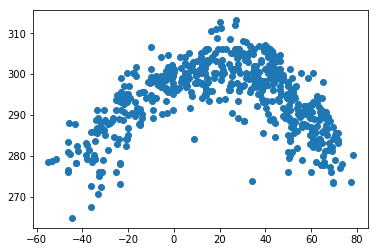

In [107]:
plt.scatter(weather_data["lat"], weather_data["temperature"], marker="o")
plt.savefig("city lat vs. temp.png")
plt.show()

In [108]:
weather_data = pd.DataFrame({
                "lat": lat,
                "humidity": humidity})
weather_data.head()

,lat,humidity
0,27.93,96
1,50.57,84
2,-9.65,94
3,-33.93,93
4,39.62,43


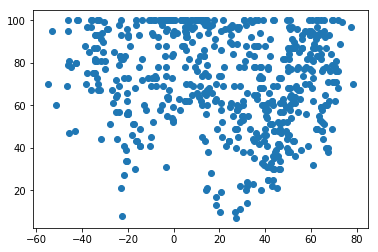

In [105]:
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")
plt.savefig("city lat vs. humidity.png")
plt.show()

In [109]:
weather_data = pd.DataFrame({
                "lat": lat,
                "wind_speed": wind_speed})
weather_data.head()

,lat,wind_speed
0,27.93,0.68
1,50.57,0.98
2,-9.65,2.93
3,-33.93,0.50
4,39.62,5.70


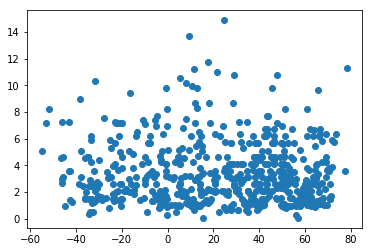

In [110]:
plt.scatter(weather_data["lat"], weather_data["wind_speed"], marker="o")
plt.savefig("city lat vs. wind.png")
plt.show()

In [111]:
weather_data = pd.DataFrame({
                "lat": lat,
                "cloudiness": temp})
weather_data.head()

,lat,cloudiness
0,27.93,293.355
1,50.57,284.455
2,-9.65,293.405
3,-33.93,286.150
4,39.62,305.650


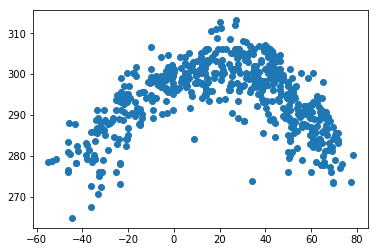

In [113]:
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o")
plt.savefig("city lat vs. cloudiness.png")
plt.show()